# Capstone: Microsoft Professional Program Artificial Intelligence

# Accents in spectrograms of Speech

## Data / Image preprocessing
- Read the images
- Show some of them
- Rescale them 
- Converto to numpy array and save to disk

In [1]:
# Import libraries
import os
import matplotlib.pyplot as plt
from skimage import io
from glob import glob
import pandas as pd
import numpy as np

%matplotlib inline 

### Read the data images and labels

In [2]:
#root folder
root_folder='..'
#root_folder='.'
data_folder_name='Datasets/speech_data'

images_to_process=4500


In [3]:
# ../input/
DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))

# ./data/train
train_path = os.path.join(DATA_PATH, "train")

# ./data/test
test_path = os.path.join(DATA_PATH, "test")

# ../data/train/*.jpg
train_images = glob(os.path.join(train_path, "*.png"))

# Load labels
labels = pd.read_csv(DATA_PATH+'/train_labels.csv')

#Save numpy arrays in a compressed file
compressed = True

#Normalize images
img_normalized=False

In [5]:
df=labels[:10]
for index, row in df.iterrows():
    print(row['file_id'], row['accent'])


10000 1
10001 1
10002 0
10003 2
10004 1
10005 1
10006 1
10007 2
10008 0
10009 2


## Analize data and labels distribution

In [13]:
print('Class 0: ',sum(labels['accent']==0))
print('Class 1: ',sum(labels['accent']==1))
print('Class 2: ',sum(labels['accent']==2))


Class 0:  1500
Class 1:  1500
Class 2:  1500


In [14]:
train_images

['C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10000.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10001.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10002.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10003.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10004.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10005.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10006.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10007.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10008.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10009.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10010.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10011.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_data\\train\\10012.png',
 'C:\\Users\\edumu\\Documents\\Datasets\\speech_dat

### Analyze sizes and characteristics in data

In [15]:
# Show some images using matplotlib
import random
r = random.sample(train_images, 16)
img = io.imread(r[0], as_gray=True)

print('Data type: %s' % img.dtype)
print('Min: %.3f Max: %.3f ' %(img.min(),img.max()))

#img= img/255

#print('Data type: %s' % img.dtype)
#print('Min: %.3f Max: %.3f ' %(img.min(),img.max()))


Data type: float64
Min: 0.000 Max: 1.000 


### Plot some images

In [39]:
#os.path.splitext(os.path.basename(train_images[0]))[0]
sub_images_0=[i for i in train_images if labels["accent"][labels["file_id"] == int(os.path.splitext(os.path.basename(i))[0])]==0]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

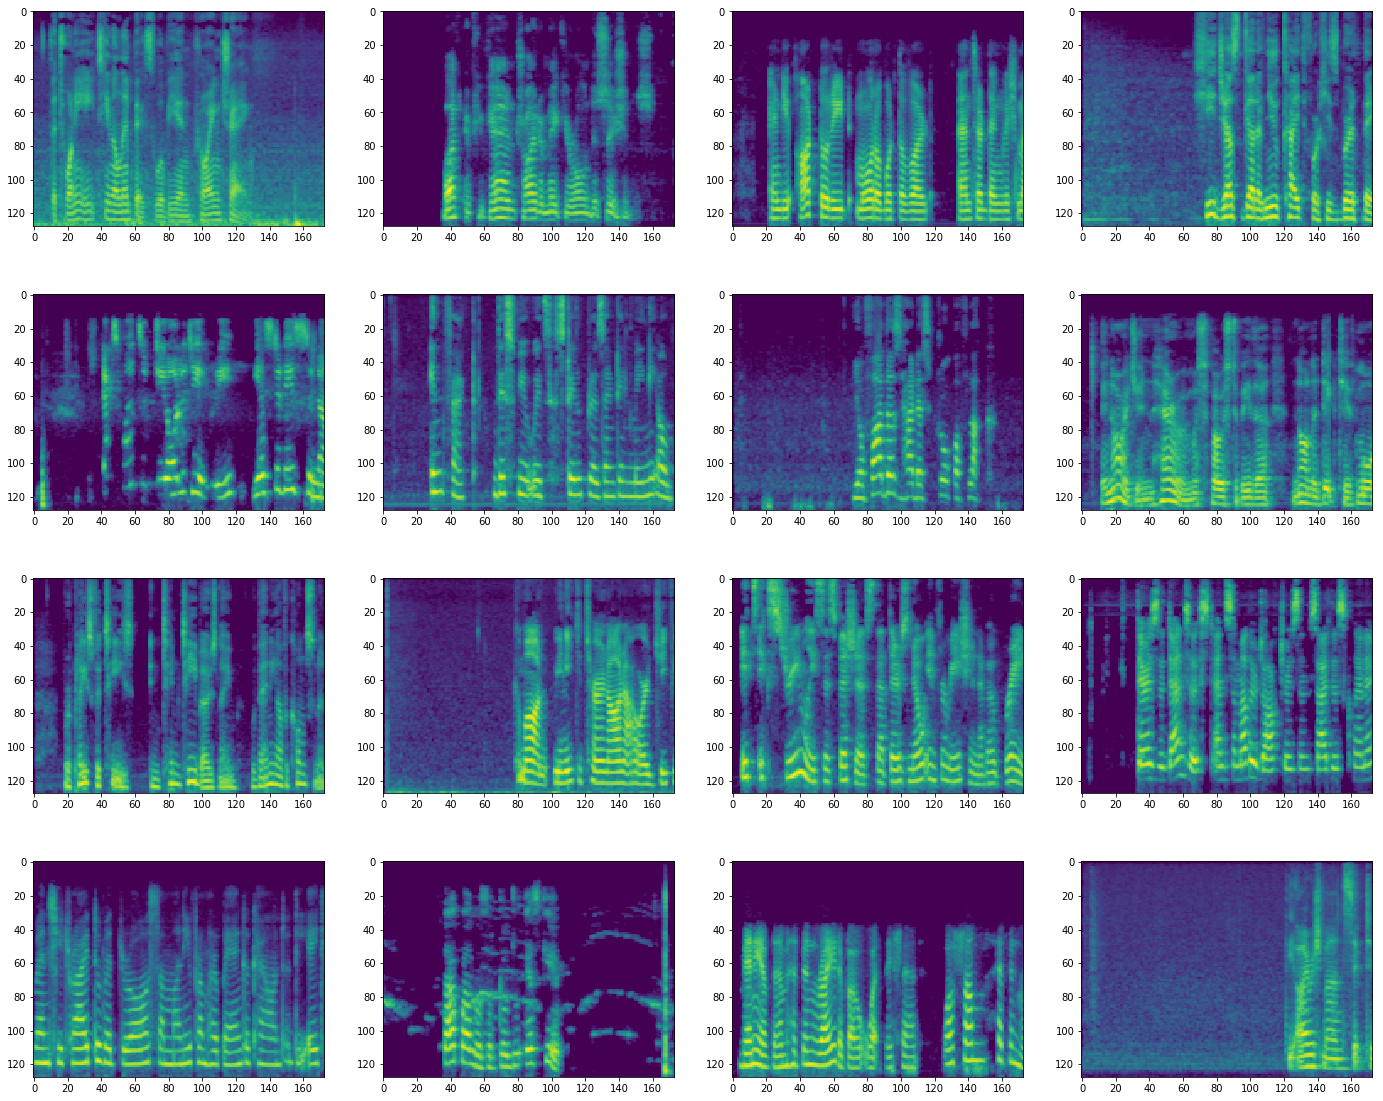

In [35]:
images=train_images
n_rows=4
n_cols=4

width=20
height = n_rows*6

r = random.sample(train_images, n_rows*n_cols)
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(height,width))
i=0
for row in ax:
    for col in row:
        col.imshow(io.imread(r[i], as_gray=True))
        i+=1

plt.show()

### Normalization of images and conversion to numpy array

In [22]:
# Processing the images to normalize them and convert to numpy arrays
def normalize(x):
    return (x.astype(float)/255.0)

def proc_images(n,images,labels):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """

    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration

    for img in images[:n]:
        base = os.path.basename(img)
        img_file,_ = os.path.splitext(base)
        
#        if labels!=None:
        label = labels["accent"][labels["file_id"] == int(img_file)].values[0]
        y.append(label)

        # Read the image
        #my_image = plt.imread(img)
        my_image = io.imread(img, as_gray=True)
        # Apend to the array and normalize
        if img_normalized:
            x.append(normalize(my_image))
        else:
            x.append(my_image)
        
    return x,y

img_array,label_array=proc_images(images_to_process,train_images,labels)

In [23]:
print('Images: ', len(img_array))
print('Labels:', len(label_array))
print('Image Shape:', img_array[0].shape)

Images:  4500
Labels: 4500
Image Shape: (128, 173)


### Save images and labels as np arrays to disk

In [7]:
if compressed:
    np.savez_compressed(DATA_PATH+"/x_images_arrays_zip_"+str(images_to_process), img_array)
else:
    np.savez(DATA_PATH+"/x_images_arrays_"+str(images_to_process), img_array)
    
np.savez(DATA_PATH+"/y_infected_labels_"+str(images_to_process), label_array)